<a href="https://colab.research.google.com/github/aschelin/SimulacoesAGFE/blob/main/IntroDiferenciacaoNum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diferenciação Numérica

> Material didático baseado no livro: *Python Programming and Numerical Methods - A Guide for Engineers and Scientists by Qingkai Kong Timmy Siauw and Alexandre Bayen. Imprint: Academic Press*.


Muitos sistemas de engenharia e ciência mudam com o tempo e com o espaço.  Em matemática, as derivadas de funções são usadas para modelar essas mudanças.  No entanto, na prática, a função pode não ser explicitamente conhecida ou pode ser representada implicitamente por um conjunto de pontos de dados.  Nestes casos e em outros, pode ser interessante calcular as derivadas numericamente em vez de analiticamente.

 O foco deste tutorial é a diferenciação numérica.  Ao final desta aula, você será capaz de derivar alguns esquemas básicos de diferenciação numérica e estimar sua precisão.

## Definindo o problema

Uma grade numérica é um conjunto de pontos uniformemente espaçados sobre o domínio de uma função (ou seja, a variável independente), em algum intervalo.  O espaçamento ou tamanho do passo de uma grade numérica é a distância entre pontos adjacentes na grade. Para os fins deste tutorial, se  $x$ é uma grade numérica, então $x_j$ é o j-ésimo ponto na grade numérica e h
é o espaçamento entre $x_j$ e $x_{j-1}$

A figura a seguir mostra um exemplo de grade numérica.

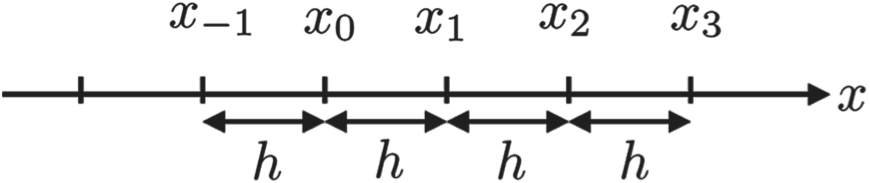

Existem várias funções do Python que podem ser usadas para gerar grades numéricas. Para grades numéricas em uma dimensão, é suficiente usar a função *linspace*

 Em Python, uma função $f(x)$ pode ser representada em um intervalo calculando seu valor em uma grade.  Embora a função em si possa ser contínua, esta representação discreta ou discretizada é útil para cálculos numéricos e corresponde a conjuntos de dados que podem ser adquiridos em situações reais de engenharia ou ciências.  
 
 Especificamente, o valor da função só pode ser conhecido em pontos discretos.  Por exemplo, um sensor de temperatura pode fornecer pares de temperatura versus tempo em intervalos de tempo regulares.  Embora a temperatura seja uma função de tempo suave e contínua, o sensor apenas fornece valores em intervalos de tempo discretos e, neste caso particular, a função subjacente nem mesmo seria conhecida.

 Seja $f$ uma função analítica ou uma representação discreta de uma, gostaríamos de obter métodos de aproximação da derivada de $f$ sobre uma grade numérica e determinar sua precisão.

A derivada $f^{\prime}(x)$ da função $f(x)$ no ponto $x=a$ é definida por:
\begin{equation}
f'(a) = \lim\limits_{x \to a}\frac{f(x) - f(a)}{x-a}
\end{equation}

A derivada em $x = a$ é a inclinação neste ponto. Em aproximações de diferenças finitas dessa inclinação, podemos usar valores da função na vizinhança do ponto $x = a$ para atingir o objetivo. Existem várias fórmulas de diferenças finitas usadas em diferentes aplicações, e três delas, onde a derivada é calculada usando os valores de dois pontos, serão apresentadas a seguir.

A diferença para a frente é a estimativa da inclinação da função em $x_j$ usando a linha que conecta $(x_j, f(x_j))$ e $(x_{j+1}, f(x_{j+1}))$ 
\begin{equation}
f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1}-x_j}
\end{equation}

A diferença para a trás é a estimativa da inclinação da função em $x_j$ usando a linha que conecta $(x_{j-1}, f(x_{j-1}))$ e $(x_j, f(x_j))$
\begin{equation}
f'(x_j) = \frac{f(x_j) - f(x_{j-1})}{x_j - x_{j-1}}
\end{equation}


A diferença central é a estimativa da inclinação da função em $x_j$  usando a linha que conecta $(x_{j-1}, f(x_{j-1}))$ e $(x_{j+1}, f(x_{j+1}))$
\begin{equation}
f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1} - x_{j-1}}
\end{equation}

A figura a seguir ilustra os três tipos diferentes de fórmulas para estimar a inclinação.

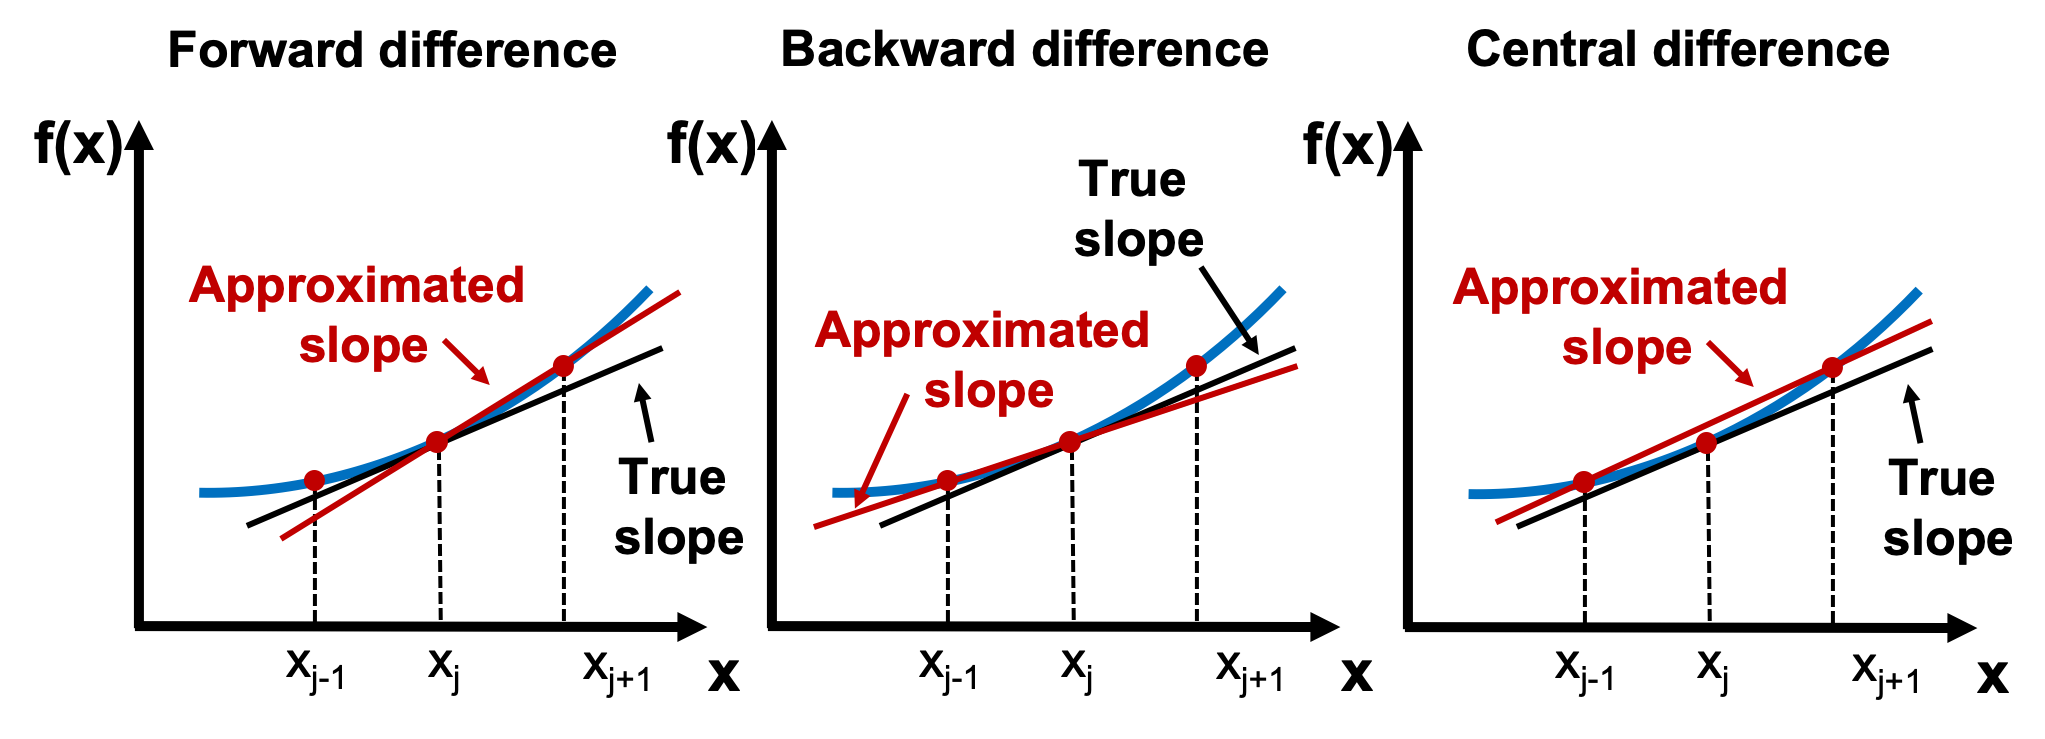


## Aproximando Diferenças Finitas com Séries de Taylor

Para obter uma aproximação para a derivada de $f$, vamos usar a série de Taylor. Para uma função arbitrária $f(x)$ a série de Taylor de $f$ em torno de $a$ é dada por:

\begin{equation}
f(x) = \frac{f(x_j)(x - x_j)^0}{0!} + \frac{f^{\prime}(x_j)(x - x_j)^1}{1!} + \frac{f''(x_j)(x - x_j)^2}{2!} + \frac{f'''(x_j)(x - x_j)^3}{3!} + \cdots.
\end{equation}

Se $x$ está em uma grade de pontos com espaçamento $h$, podemos calcular a série de Taylor em $x = x_{j+1}$

\begin{equation}
f(x_{j+1}) = \frac{f(x_j)(x_{j+1} - x_j)^0}{0!} + \frac{f^{\prime}(x_j)(x_{j+1}- x_j)^1}{1!} + \frac{f''(x_j)(x_{j+1} - x_j)^2}{2!} + \frac{f'''(x_j)(x_{j+1} - x_j)^3}{3!} + \cdots.
\end{equation}

Substituindo $h = x_{j+1} - x_j$ e resolvendo para $f^{\prime}(x_j)$:

\begin{equation}
f^{\prime}(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} + \left(-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots\right).
\end{equation}

Os termos entre parênteses $-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots$ são chamados de termos de ordens maiores de $h$. Esses termos vão a zero quando $h\approx0$. 

Usando a abreviatura $O(h)$ para esses termos e substituindo na equação obtida anteriormente
\begin{equation}
f^{\prime}(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} + O(h).
\end{equation}


Isto nos fornece a fórmula da diferenciação para a frente
\begin{equation}
f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_j)}{h},
\end{equation}
e dizemos que essa fórmula é $O(h)$, ou seja, de ordem $h$. 

Aqui, $O(h)$ descreve a **precisão** da fórmula de diferença para frente (*forward*) para aproximar derivadas. Para uma aproximação que é $O(h^p)$, dizemos que $p$ é a ordem da precisão da aproximação. Com poucas exceções, a precisão de ordem superior é melhor do que a de ordem inferior. Para ilustrar esse ponto, suponha que $q<p$.  $>h> 0$, vai para 0, $h^p$ vai para 0 mais rápido do que $h^q$. Portanto, conforme $h$ vai para 0, uma aproximação de um valor que é $O(h^p)$ se aproxima do valor verdadeiro mais rapidamente do que um que é $O(h^q)$.

Calculando a série de Taylor em torno de $a=x_j$ em $x=x_{j-1}$ e novamente resolvendo para $f′(x_j)$, obtemos a fórmula da diferença reversa

\begin{equation}
f^{\prime}(x_j) \approx \frac{f(x_j) - f(x_{j-1})}{h},
\end{equation}

que também é $O(h)$. Tente verificar esse resultado por conta própria.

Intuitivamente, as fórmulas de diferença para frente e para trás para a derivada em $x_j$ são apenas as inclinações entre o ponto em $x_j$ e os pontos $x_{j + 1}$ e $x_{j − 1}$, respectivamente.

Podemos construir uma aproximação melhorada da derivada pela manipulação inteligente dos termos da série de Taylor tomados em pontos diferentes. Para ilustrar, podemos calcular a série de Taylor em torno de $a = x_j$ em $x_{j + 1}$ e $x_{j − 1}$

\begin{equation}
f(x_{j+1}) = f(x_j) + f^{\prime}(x_j)h + \frac{1}{2}f''(x_j)h^2 + \frac{1}{6}f'''(x_j)h^3 + \cdots
\end{equation}

e

\begin{equation}
f(x_{j-1}) = f(x_j) - f^{\prime}(x_j)h + \frac{1}{2}f''(x_j)h^2 - \frac{1}{6}f'''(x_j)h^3 + \cdots.
\end{equation}

Subtraindo as duas equações:
\begin{equation}
f(x_{j+1}) - f(x_{j-1}) = 2f^{\prime}(x_j) + \frac{2}{3}f'''(x_j)h^3 + \cdots,
\end{equation}


que quando resolvido para $f^{\prime}(x_j)$ dá a fórmula da diferença central

\begin{equation}
f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_{j-1})}{2h}.
\end{equation}

Por causa de como subtraímos as duas equações, os termos $h$ se cancelaram; portanto, a fórmula de diferença central é $O (h^2)$, embora requeira a mesma quantidade de esforço computacional que as fórmulas de diferença para frente e para trás! Assim, a fórmula de diferença central obtém uma ordem extra de precisão gratuitamente. Em geral, as fórmulas que utilizam pontos simétricos em torno de $x_j$, por exemplo $x_{j − 1}$ e $x_{j + 1}$, têm melhor precisão do que as assimétricas, como as fórmulas de diferença para frente e para trás.

A figura a seguir mostra a diferença progressiva (linha que conecta $(x_j, y_j)$ e $(x_{j+1}, y_{j+1})$, a diferença regressiva (linha que conecta $(x_j, y_j)$ e $(x_{j-1}, y_{j-1}$), e a diferença central (linha que conecta $(x_{j-1}, y_{j-1})$ e $(x_{j+1}, y_{j+1}$) na aproximação da derivada de uma função $f$. Como pode ser visto, a diferença no valor da inclinação pode ser mudar significativamente com base no tamanho de $h$ e a natureza da função.

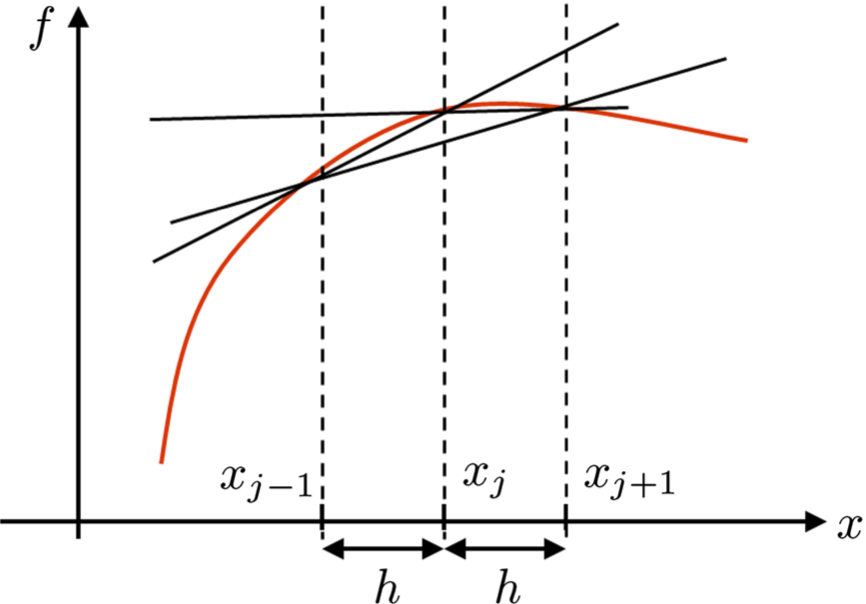

# Exemplo 1

Considere a função $f (x) = \cos (x)$. Sabemos que a derivada de $\cos (x)$ é $−\sin (x)$. Embora, na prática, possamos não saber a função subjacente para a qual estamos encontrando a derivada, usamos esse exemplo simples para ilustrar os métodos de diferenciação numérica mencionados acima e sua precisão. O código a seguir calcula as derivadas numericamente.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')


In [ ]:
# Tamanho do passo:
h = 0.1
# Definindo a grade:
x = np.arange(0, 2*np.pi, h) 
# Calculando a função:
y = np.cos(x) 


In [ ]:
# Calculando o vertor com diferenças para frente
forward_diff = np.diff(y)/h 
# Calcular a grade correspondente
x_diff = x[:-1] 
# Solução exata:
exact_solution = -np.sin(x_diff) 


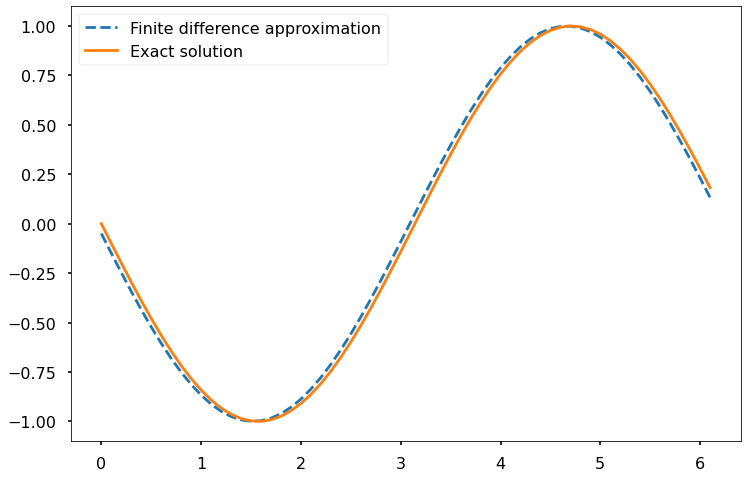

In [ ]:

# Plotando as soluções
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Aproximação por diferença finita')
plt.plot(x_diff, exact_solution, \
         label = 'Solução Exata')
plt.legend()
plt.show()



In [ ]:
# Calcular o erro entre solução exata e aproximada 

max_error = max(abs(exact_solution - forward_diff))
print(max_error)

0.049984407218554114


# Exemplo 2 
Calcule a derivada numérica de $f (x) = \cos (x)$ usando a fórmula de diferença para frente diminuindo o tamanho dos passos, $h$. Em seguida, plote o erro máximo entre a derivada aproximada e a derivada verdadeira versus $h

In [ ]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20 
# list to store our step sizes
step_size = [] 
# list to store max error for each step size
max_error = [] 

In [ ]:
for i in range(iterations):
    # halve the step size
    h /= 2 
    # store this step size
    step_size.append(h) 
    # compute new grid
    x = np.arange(0, 2 * np.pi, h) 
    # compute function value at grid
    y = np.cos(x) 
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    # compute corresponding grid
    x_diff = x[:-1] 
    # compute exact solution
    exact_solution = -np.sin(x_diff) 
    
    # Compute max error between 
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

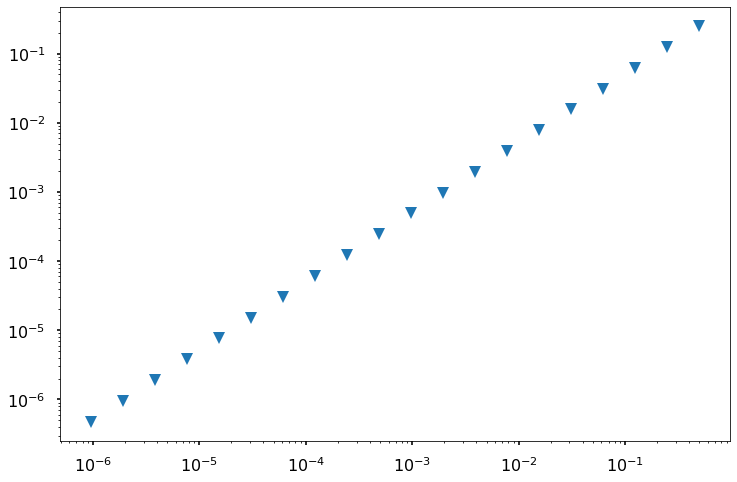

In [ ]:
# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

A inclinação da linha no espaço log-log é 1; portanto, o erro é proporcional a $h^1$, o que significa que, como esperado, a fórmula da diferença para frente é $O (h)$.

# Exemplo 3
Use a diferença regressiva para calcular a derivada aproximada de $\sin(x)$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0,5*np.pi,100)
f = lambda x: np.sin(x)


In [ ]:
h = 0.1
diff_reg = lambda a: (f(a) - f(a - h))/h

In [ ]:
derivada = diff_reg(x)

In [ ]:
d_analitica = np.cos(x)

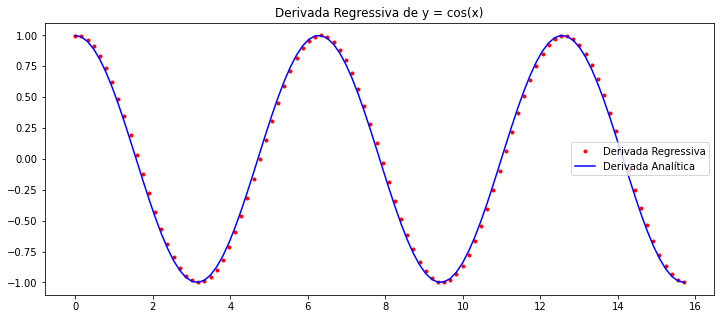

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(x,derivada,'r.',label='Derivada Regressiva')
plt.plot(x,d_analitica,'b',label='Derivada Analítica')

plt.title('Derivada Regressiva de y = cos(x)')
plt.legend(loc='best')
plt.show()

# Exemplo 4
Construa uma função que calcule derivadas progressivas, regressivas e centrais para qualquer função matemática: 

In [ ]:
def derivadas(f,a,method='central',h=0.01):
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'progressiva':
        return (f(a + h) - f(a))/h
    elif method == 'regressiva':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("O método deve ser 'central', 'progressiva' ou 'regressiva'.")

In [ ]:
derivadas(np.cos,0,method='progressiva',h=1e-8)


0.0

In [ ]:
x = np.linspace(0,5*np.pi,100)
dydx = derivadas(np.sin,x)

Vamos calcular e representar graficamente a derivada de uma função complicada:
\begin{equation}
y=\left(\frac{4x^2+2x+1}{x+2e^x}\right)^x
\end{equation}

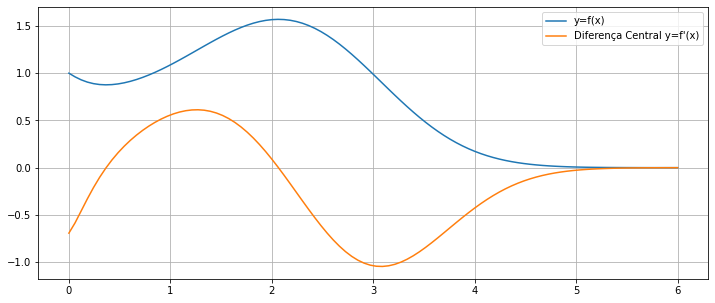

In [ ]:
x = np.linspace(0,6,100)
f = lambda x: ((4*x**2 + 2*x + 1)/(x + 2*np.exp(x)))**x
y = f(x)
dydx = derivadas(f,x)

plt.figure(figsize=(12,5))
plt.plot(x,y,label='y=f(x)')
plt.plot(x,dydx,label="Diferença Central y=f'(x)")
plt.legend()
plt.grid(True)

plt.show()